Shape of the data
(205, 26)
Getting the information about the data frame columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionr

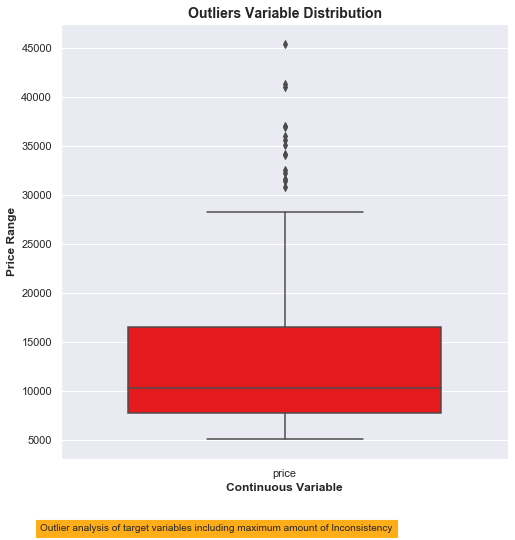

(205, 25)
0    alfa-romero giulia      
1    alfa-romero stelvio     
2    alfa-romero Quadrifoglio
3    audi 100 ls             
4    audi 100ls              
Name: CarName, dtype: object
Extracting Car Company from the CarName as per problem statement
0      alfa-romero
1      alfa-romero
2      alfa-romero
3      audi       
4      audi       
       ...        
200    volvo      
201    volvo      
202    volvo      
203    volvo      
204    volvo      
Name: CarName, Length: 205, dtype: object
Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


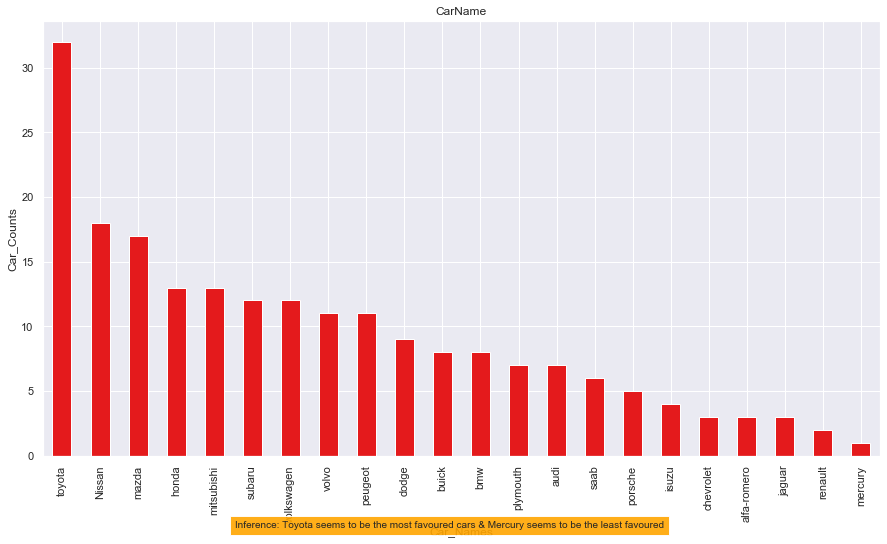

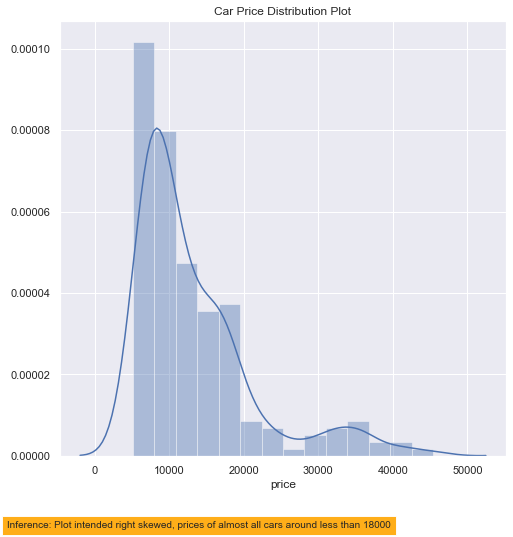

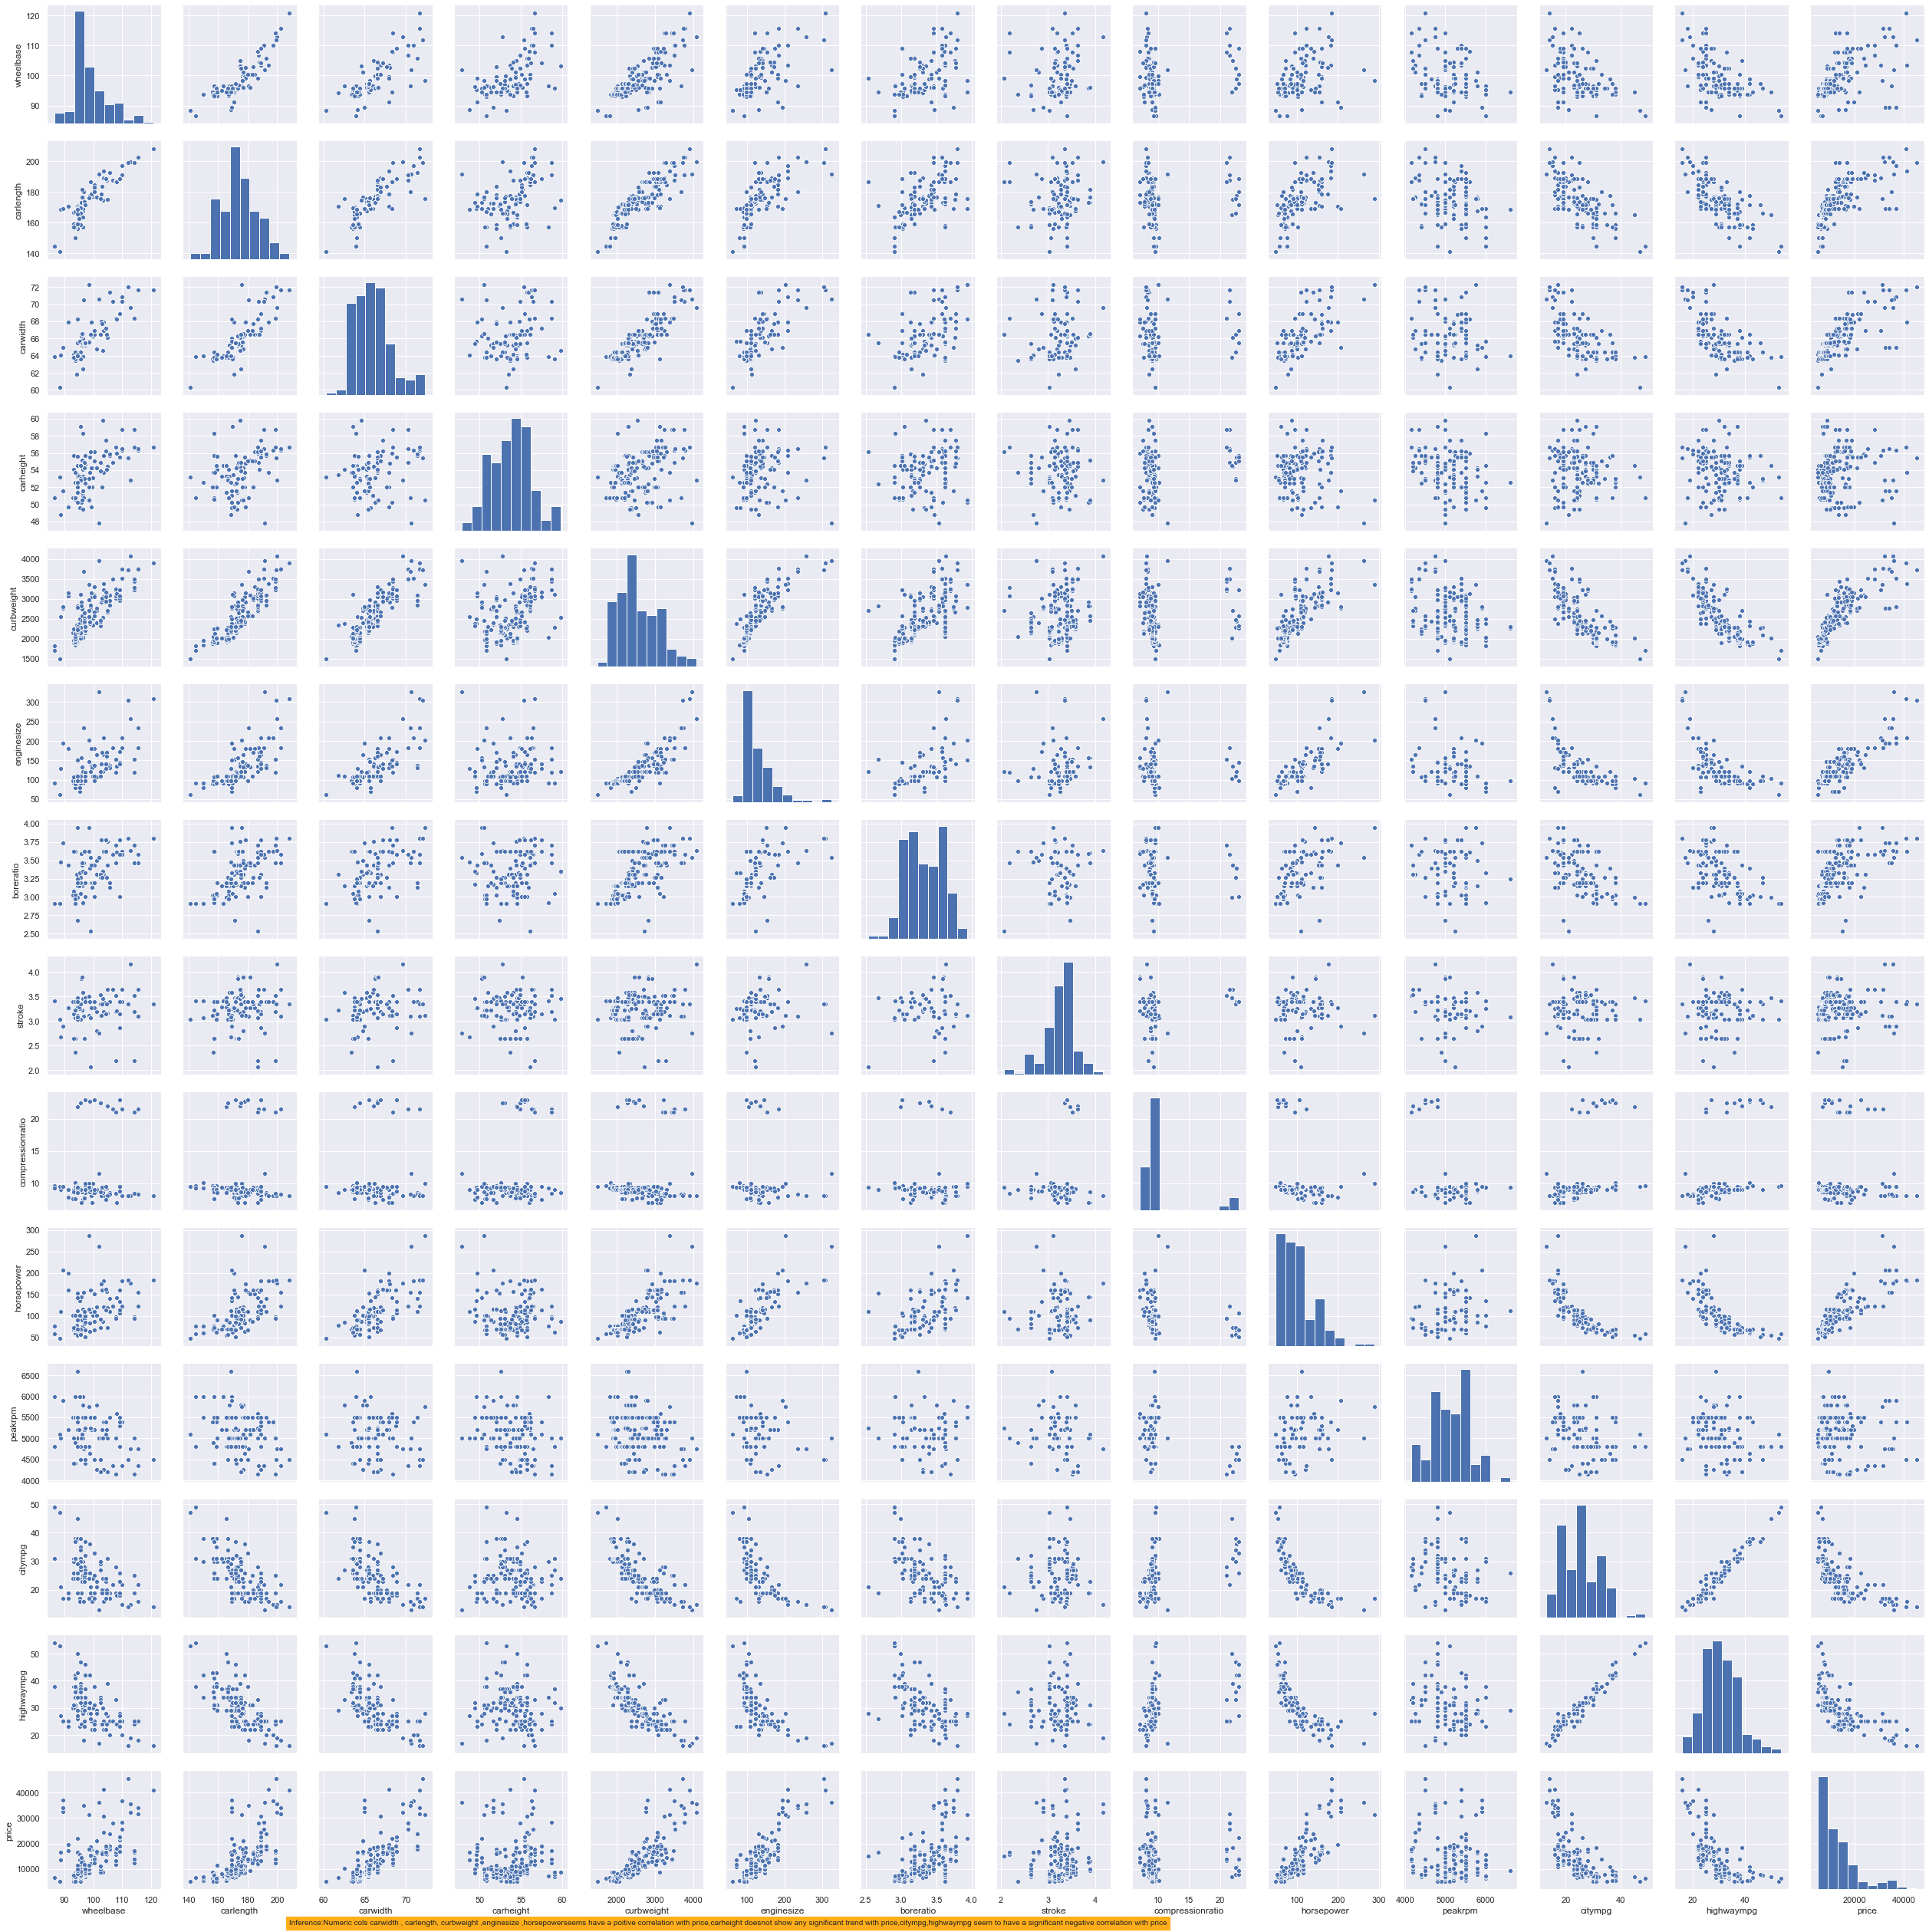

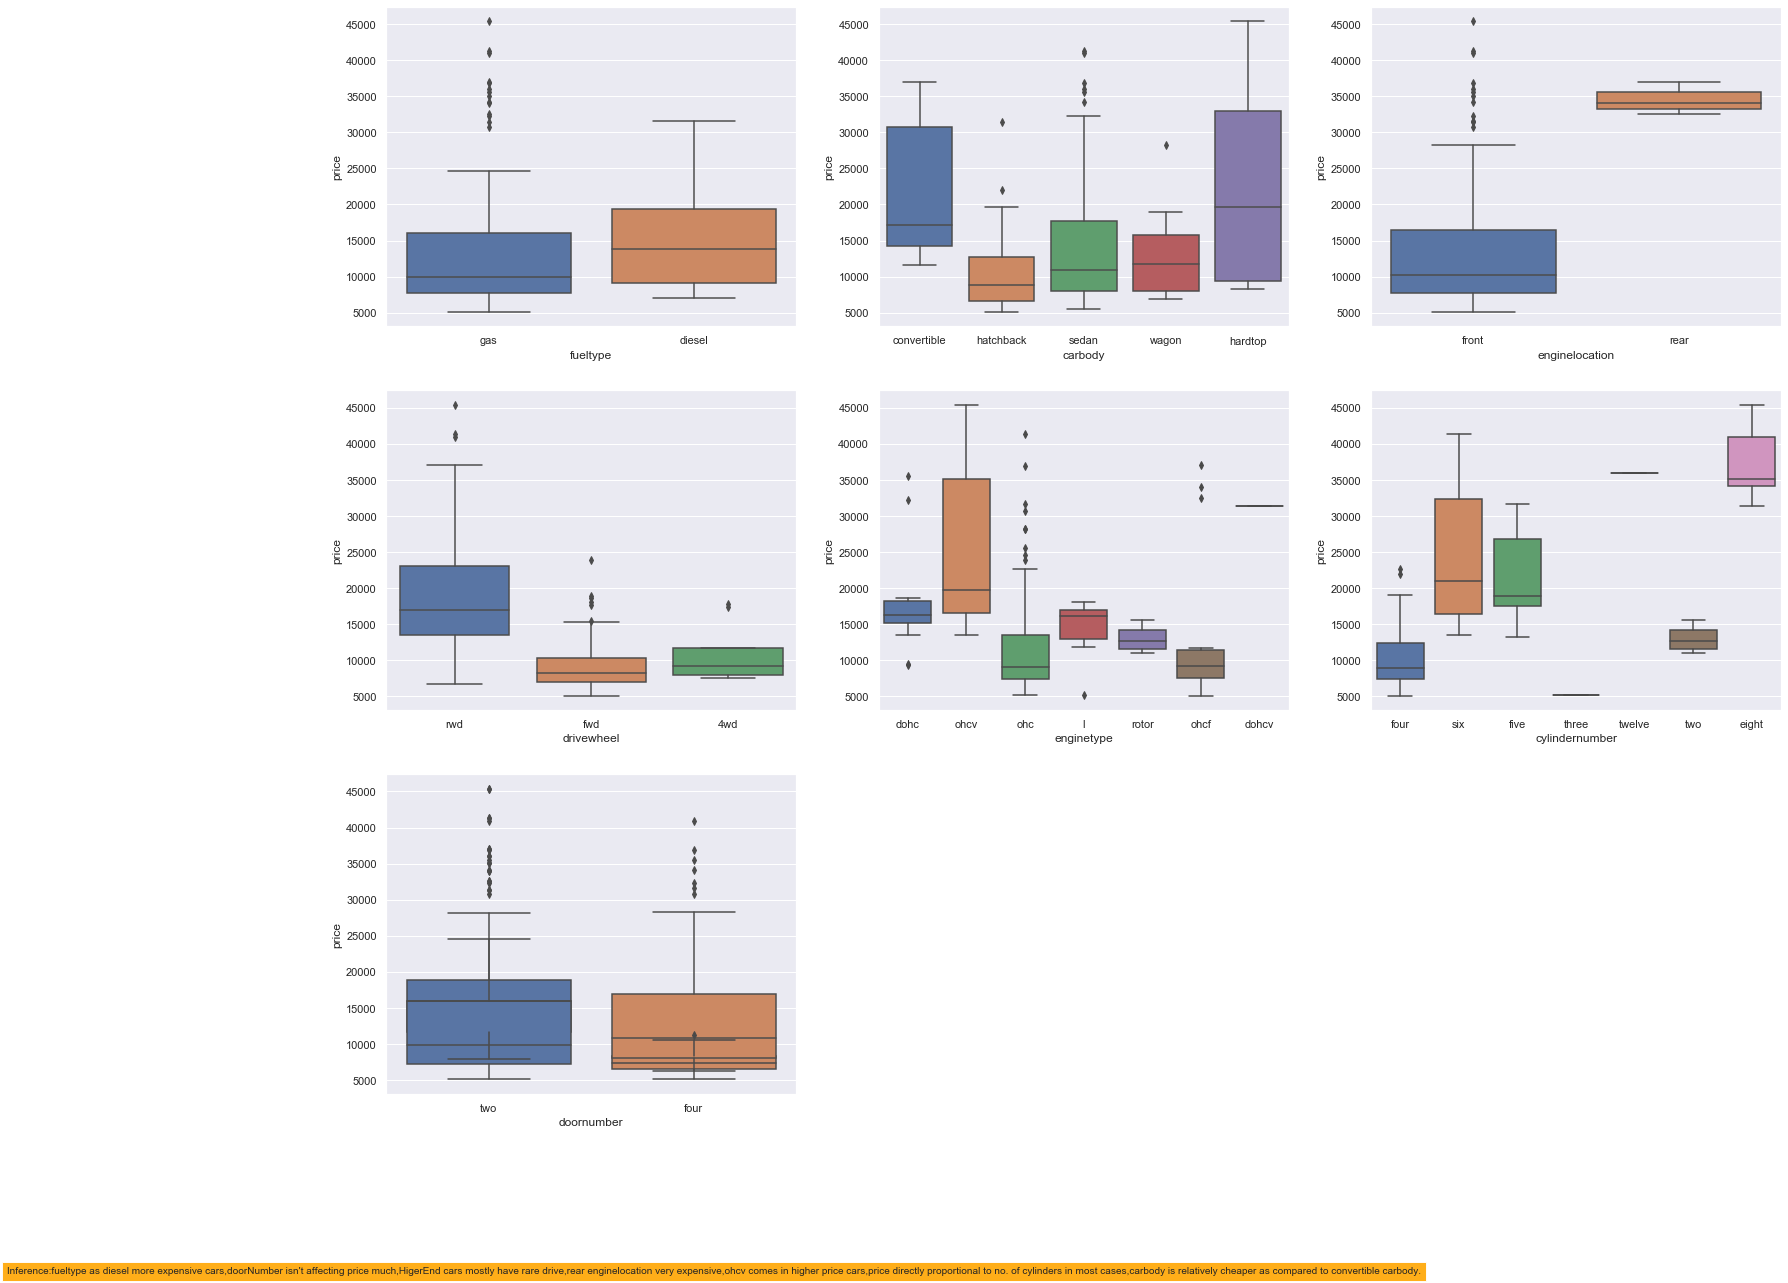

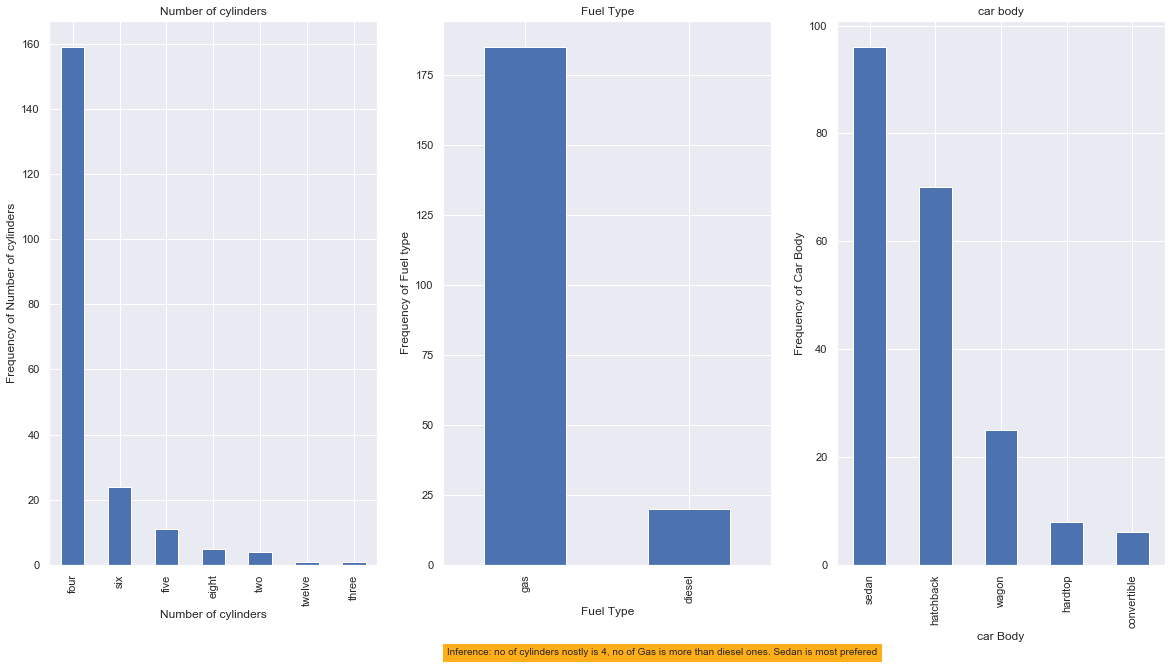

<Figure size 1440x1080 with 0 Axes>

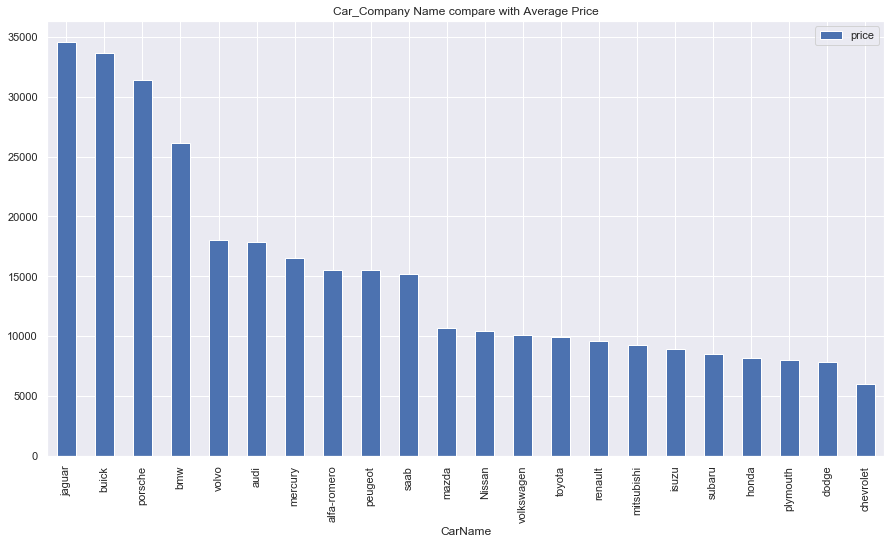

<Figure size 1440x1080 with 0 Axes>

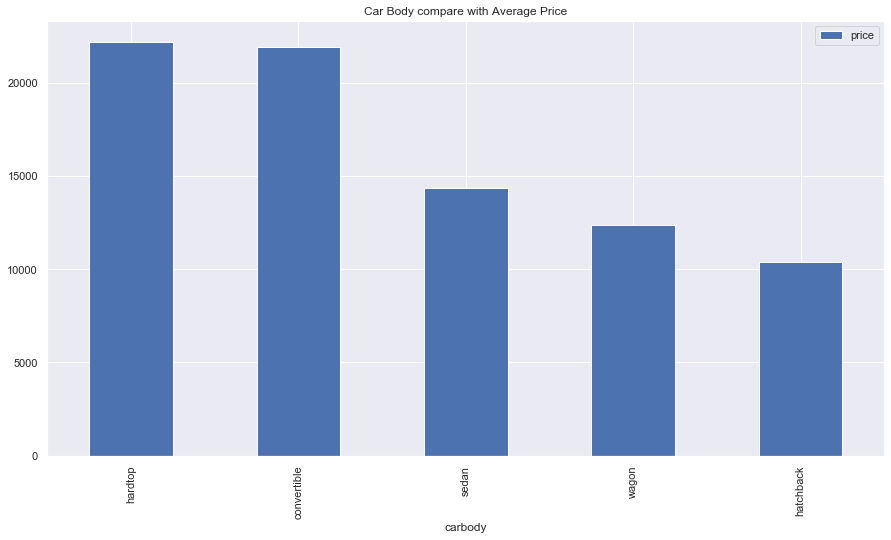

   price Cars_Category enginetype fueltype aspiration      carbody  \
0  13495  Medium_Range  dohc       gas      std        convertible   
1  16500  Medium_Range  dohc       gas      std        convertible   
2  16500  Medium_Range  ohcv       gas      std        hatchback     
3  13950  Medium_Range  ohc        gas      std        sedan         
4  17450  Medium_Range  ohc        gas      std        sedan         

  cylindernumber drivewheel  wheelbase  curbweight  enginesize  boreratio  \
0  four           rwd       88.6000     2548        130        3.4700       
1  four           rwd       88.6000     2548        130        3.4700       
2  six            rwd       94.5000     2823        152        2.6800       
3  four           fwd       99.8000     2337        109        3.1900       
4  five           4wd       99.4000     2824        136        3.1900       

   horsepower  citympg  highwaympg  carlength  carwidth  
0  111         21       27         168.8000   64.1000    


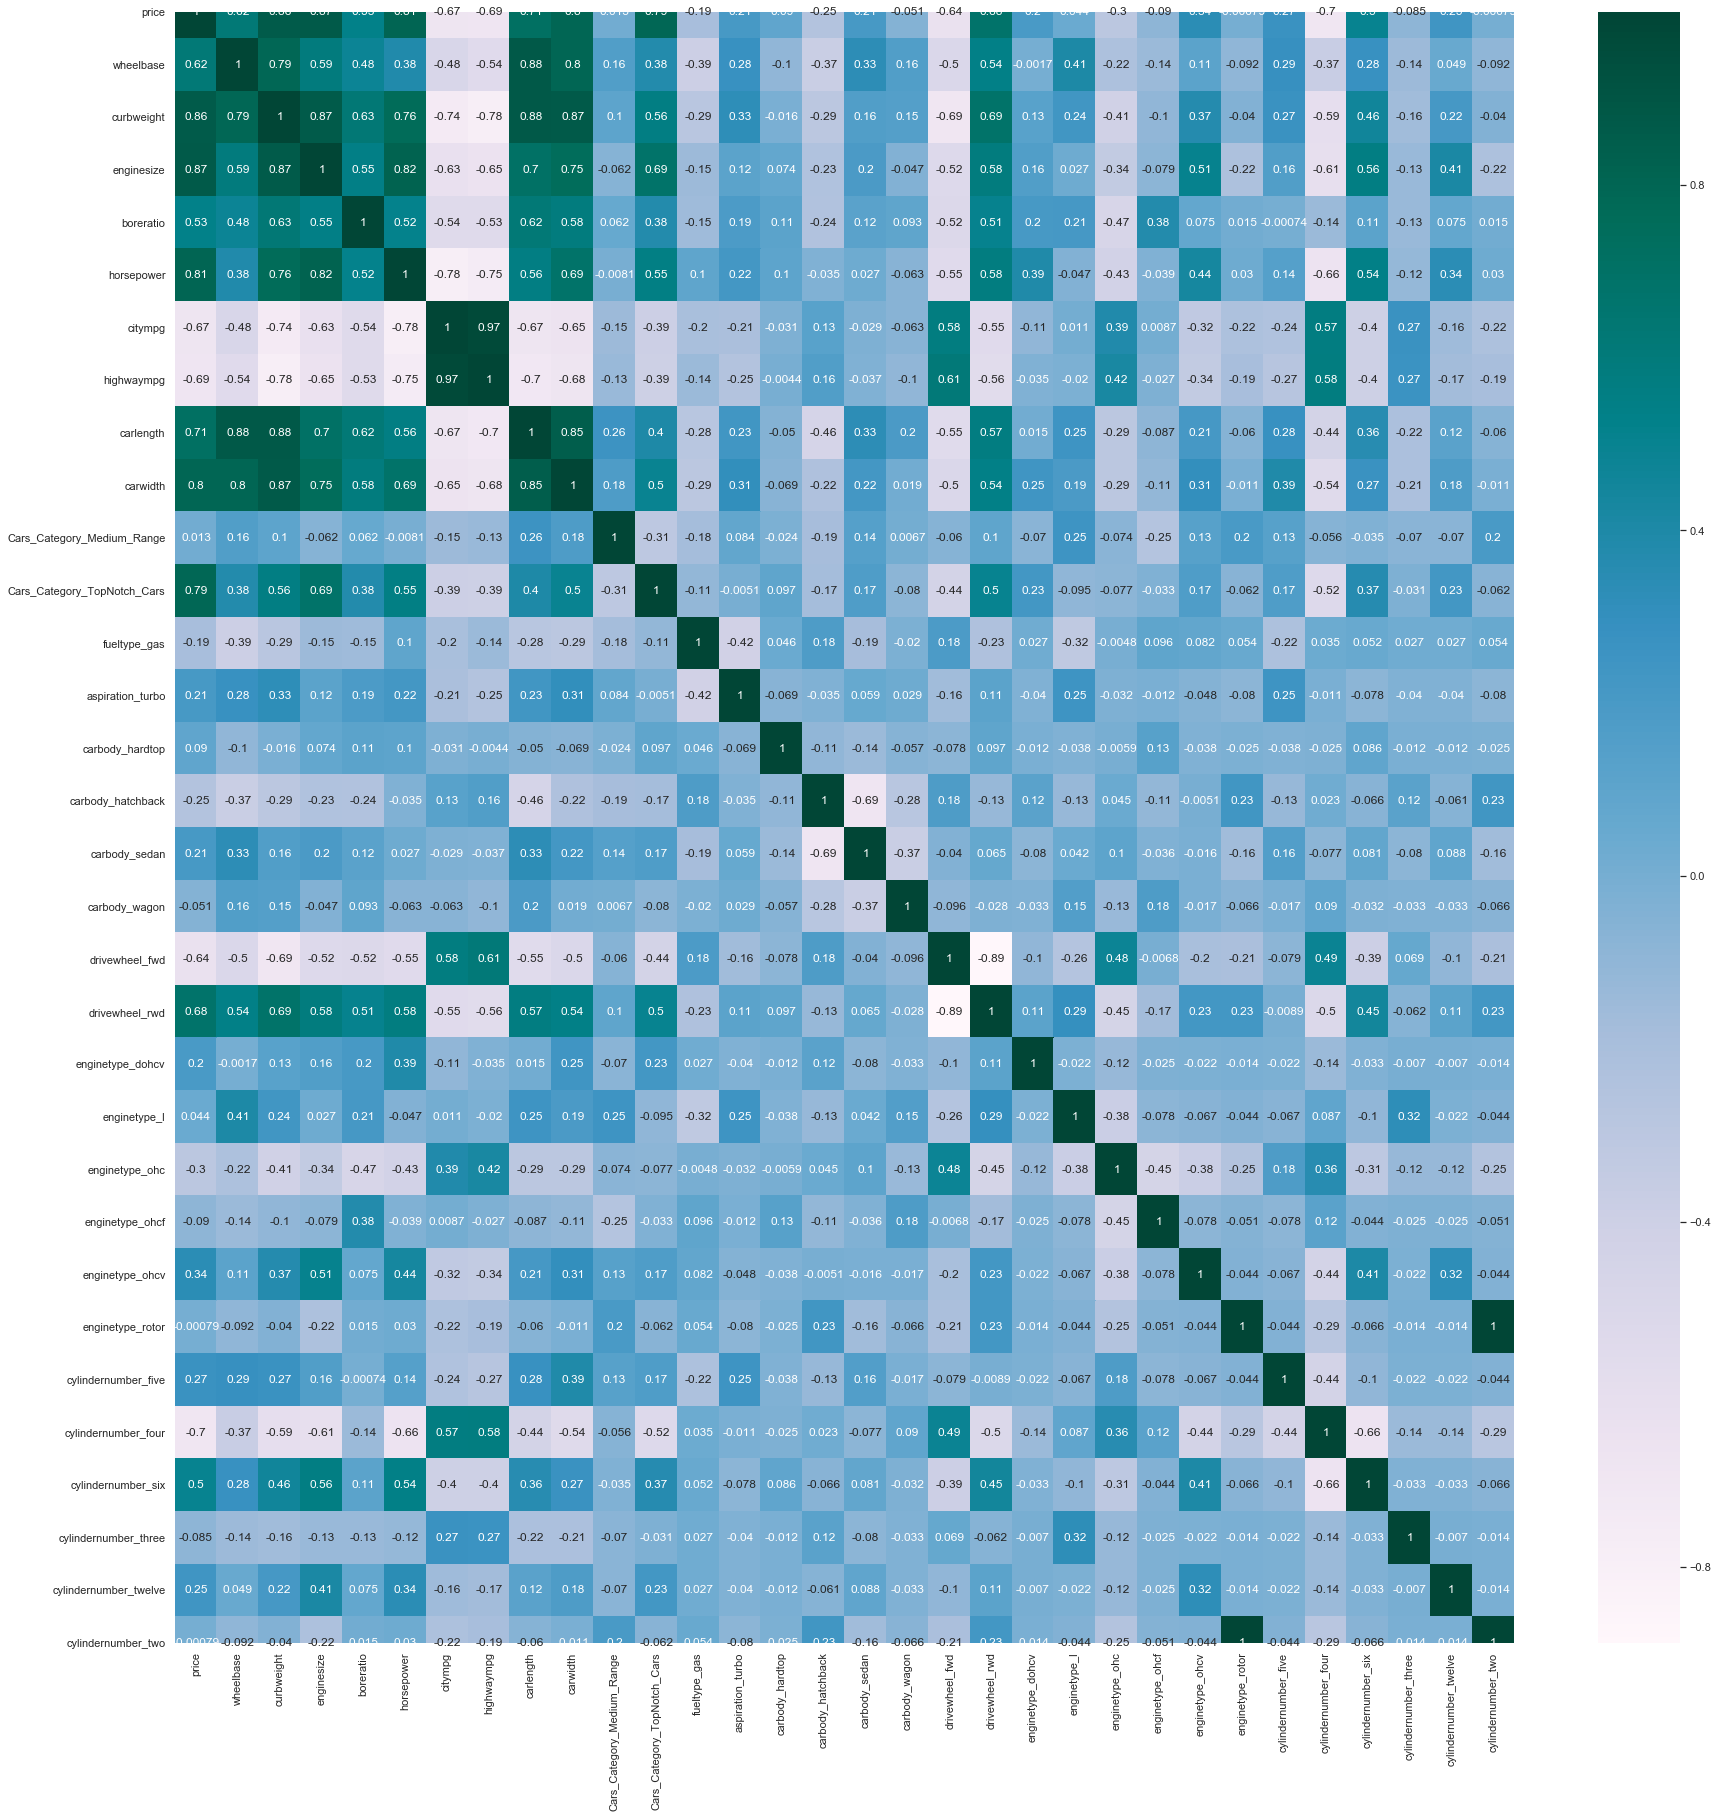

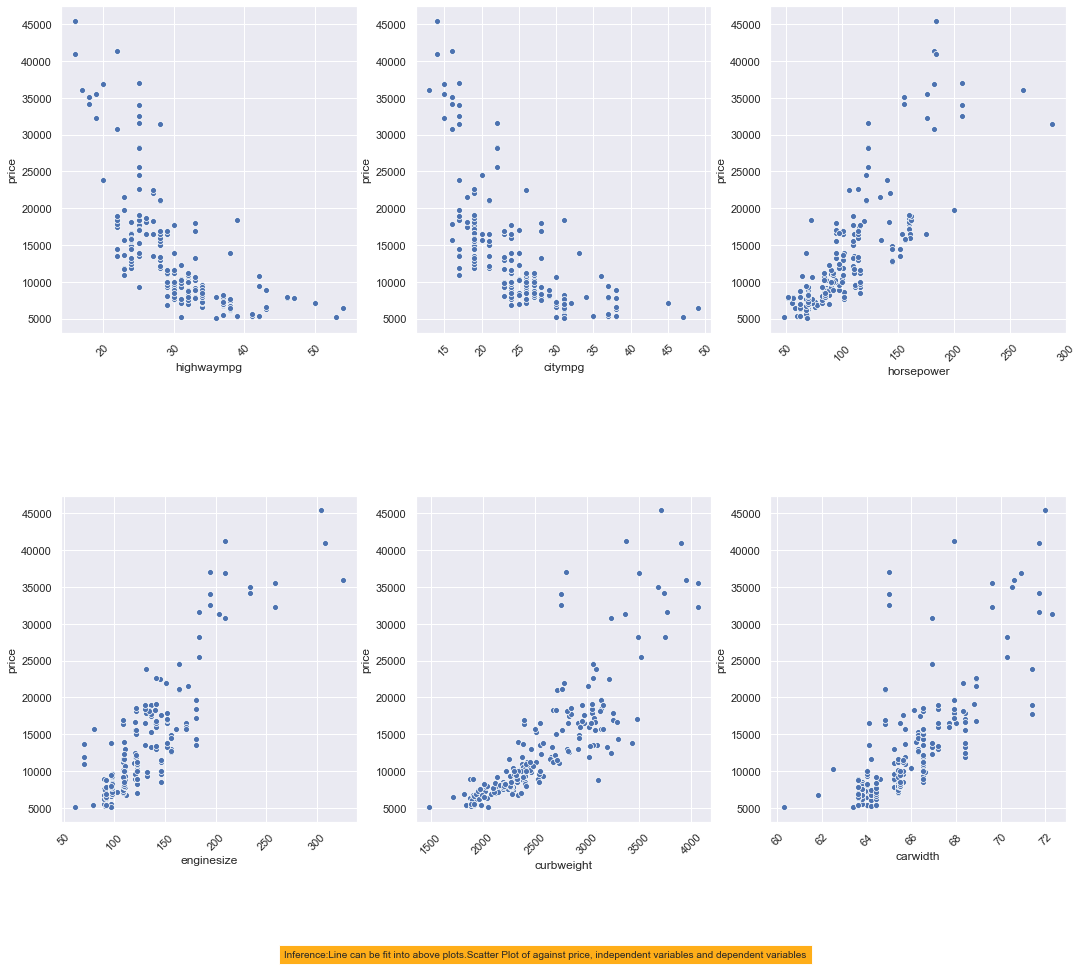

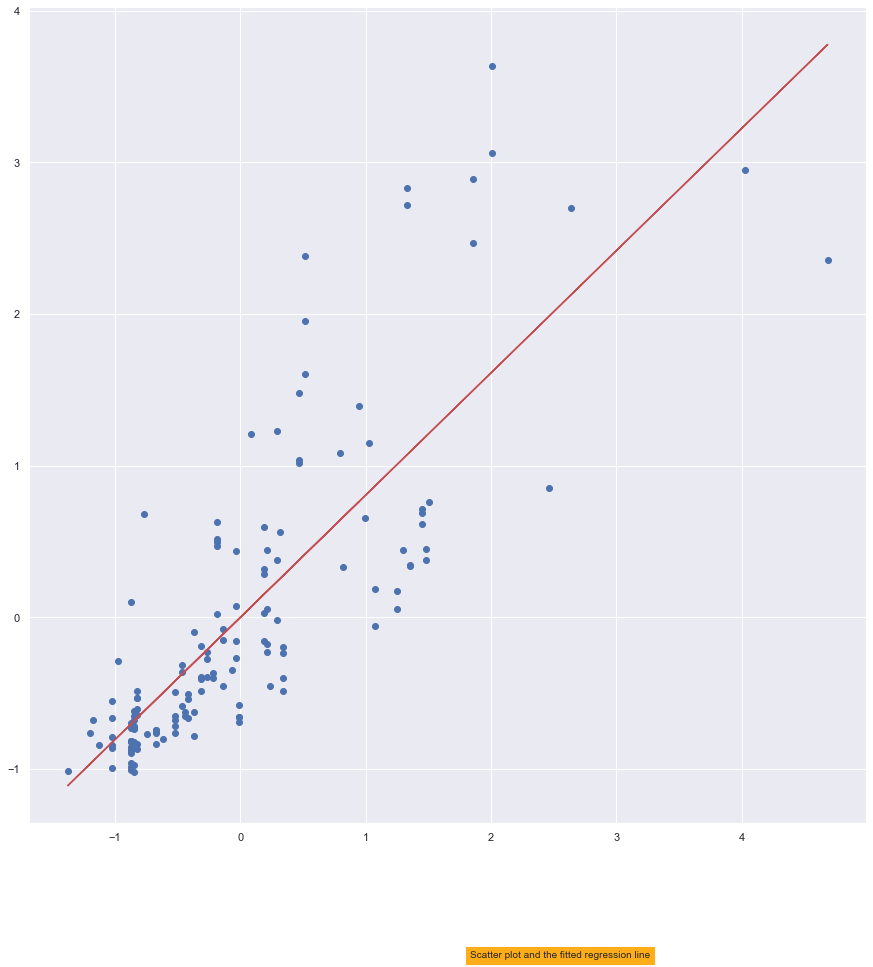

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     261.8
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           6.05e-34
Time:                        16:35:26   Log-Likelihood:                -127.86
No. Observations:                 143   AIC:                             259.7
Df Residuals:                     141   BIC:                             265.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.112e-17      0.050   1.43e-15      1.0

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     181.6
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.91e-72
Time:                        16:35:27   Log-Likelihood:                -10.457
No. Observations:                 143   AIC:                             42.91
Df Residuals:                     132   BIC:                             75.51
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

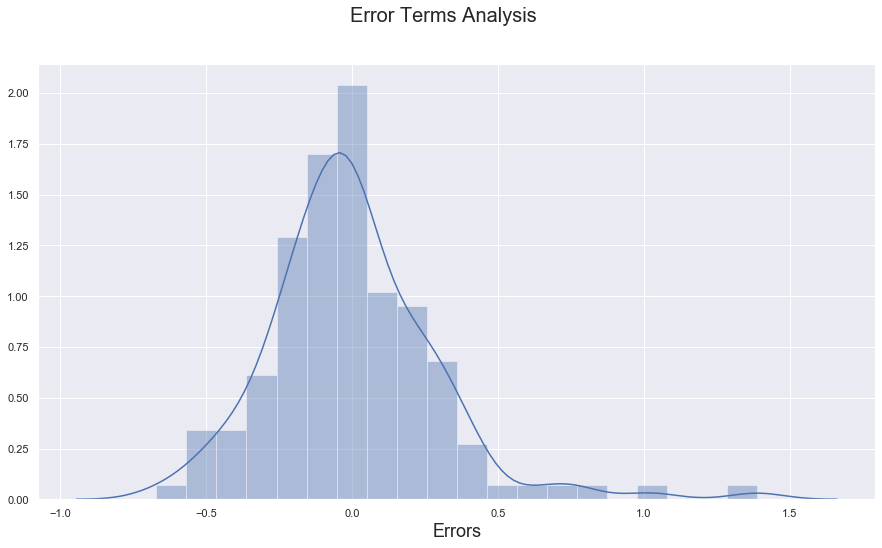

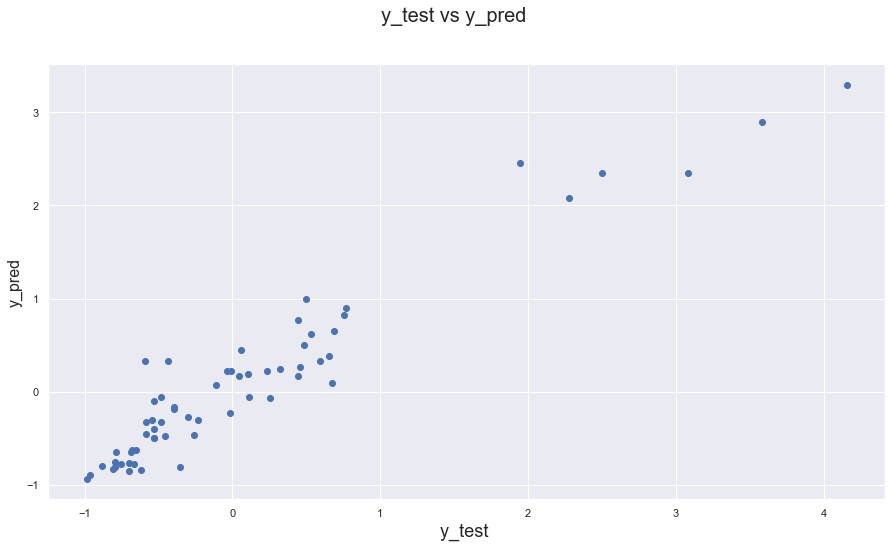

In [2]:
# importing required libraries
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# import warnings warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
# import all libraries and dependencies for machine learning
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm 
# import all libraries and dependencies for data visualization
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
scaler = preprocessing.StandardScaler()
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')

#Load the car details from csv into a dataframe and describe information of data
def data_loading():
    car_price_df = pd.read_csv('CarPrice_Assignment.csv',engine='python')
    print("Shape of the data")
    print(car_price_df.shape)
    print("Getting the information about the data frame columns")
    print(car_price_df.info())
    print("Detail description of all the columns")
    print(car_price_df.describe())

    return car_price_df;

#Calculating missing value %
def missing_val (data_frame):
    car_price_df_null = data_frame.isna().mean().round(4) * 100
    car_price_df_null = car_price_df_null.sort_values(ascending=False).head()
    return car_price_df_null;

#Extracting Car Company from the CarName
def extract_name(data_frame, col_name):
    df_col_name = data_frame[col_name].apply(lambda x: x.split(" ")[0])
    print(df_col_name)
    return df_col_name;

# This method preparing the data by removing unlikely to use column
# Dropping the columns that doesn't any significance for analysis
# Outlier analysis of target var and maximum amount of Inconsistency
def data_cleaning(car_price_df):
    
    car_price_df.drop('car_ID',inplace=True,axis=1)
    print("Calculating the Missing Values % contribution in DF")
    missing_val (car_price_df)
    outliers = ['price']
    plt.rcParams['figure.figsize'] = [8,8]
    plt.figtext(0.7, 0, "Outlier analysis of target variables including maximum amount of Inconsistency", ha="right",fontsize=10, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    sns.boxplot(data=car_price_df[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
    plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
    plt.ylabel("Price Range", fontweight = 'bold')
    plt.xlabel("Continuous Variable", fontweight = 'bold')
    plt.show()
    print(car_price_df.shape)

    #Display the CarName column before splitting it up.
    print(car_price_df['CarName'].head())
    print("Extracting Car Company from the CarName as per problem statement")
    car_price_df['CarName'] = extract_name(car_price_df,'CarName')
    # Unique Car company
    car_price_df['CarName'].unique()
    
    # Rectifying the typo errors in Car Company names such as maxda is mazda

    car_price_df['CarName'] = car_price_df['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
    car_price_df.to_csv('CarName.csv')
    
    # changing the datatype of symboling as it is categorical variable as per dictionary file
    car_price_df['symboling'] = car_price_df['symboling'].astype(str)
    
    # checking for duplicates
    car_price_df.loc[car_price_df.duplicated()]
    return car_price_df

#Visualization of data
def data_visualization(car_price_df):
    # Visualizing the different car names available
    plt.rcParams['figure.figsize'] = [15,8]
    
    ax=car_price_df['CarName'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
    ax.title.set_text('CarName')
    plt.figtext(0.7, 0, "Inference: Toyota seems to be the most favoured cars & Mercury seems to be the least favoured", ha="right",fontsize=10, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    plt.xlabel("Car_Names")
    plt.ylabel("Car_Counts")
    #Inference: Toyota seems to be the most favoured cars & Mercury seems to be the least favoured
    #Visualizing the distribution of car prices
    plt.figure(figsize=(8,8))
    plt.figtext(0.7, 0, "Inference: Plot intended right skewed, prices of almost all cars around less than 18000", ha="right",fontsize=10, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    plt.title('Car Price Distribution Plot')
    sns.distplot(car_price_df['price'])
    
    # Segregation of Numerical and Categorical Variables/Columns
    categorical_col = car_price_df.select_dtypes(include=['object']).columns
    numerical_col = car_price_df.select_dtypes(exclude=['object']).columns
    print(numerical_col)
   
    df_categorical = car_price_df[categorical_col]
    df_numerical = car_price_df[numerical_col]
    
    #Visualising Numeric Variables
    ax = sns.pairplot(car_price_df[numerical_col])
    plt.figtext(0.6, 0, "Inference:Numeric cols carwidth , carlength, curbweight ,enginesize ,horsepowerseems have a poitive correlation with price,carheight doesnot show any significant trend with price,citympg,highwaympg seem to have a significant negative correlation with price", ha="right",fontsize=10, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    #Inference: from numeric columns,carwidth , carlength, curbweight ,enginesize ,horsepowerseems to have a poitive correlation with price,carheight doesn't show any significant trend with price,citympg , highwaympg seem to have a significant negative correlation with price
    
    #Visualising Categorical Variables 
    plt.figure(figsize=(25, 20))
    plt.figtext(0.7, 0,"Inference:fueltype as diesel more expensive cars,doorNumber isn't affecting price much,HigerEnd cars mostly have rare drive,rear enginelocation very expensive,ohcv comes in higher price cars,price directly proportional to no. of cylinders in most cases,carbody is relatively cheaper as compared to convertible carbody.", ha="right",fontsize=10, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    plt.subplot(3,3,1)
    sns.boxplot(x = 'fueltype', y = 'price', data = car_price_df)
    plt.subplot(3,3,2)
    sns.boxplot(x = 'carbody', y = 'price', data = car_price_df)
    plt.subplot(3,3,3)
    sns.boxplot(x = 'enginelocation', y = 'price', data = car_price_df)
    plt.subplot(3,3,4)
    sns.boxplot(x = 'drivewheel', y = 'price', data = car_price_df)
    plt.subplot(3,3,5)
    sns.boxplot(x = 'enginetype', y = 'price', data = car_price_df)
    plt.subplot(3,3,6)
    sns.boxplot(x = 'cylindernumber', y = 'price', data = car_price_df)
    plt.subplot(3,3,7)
    sns.boxplot(x = 'fuelsystem', y = 'price', data = car_price_df)
    plt.subplot(3,3,7)
    sns.boxplot(x = 'doornumber', y = 'price', data = car_price_df)
    plt.show()
    
    #Inference:fueltype as diesel more expensive cars,doorNumber isn't affecting price much,HigerEnd cars mostly have rare drive,rear enginelocation very expensive,
    #ohcv comes in higher price cars,price directly proportional to no. of cylinders in most cases,carbody is relatively cheaper as compared to convertible carbody.
    
    #Visualise number of cylinders, fuel types & car body
    plt.figure(figsize=(20, 10))
    plt.figtext(0.7, 0, "Inference: no of cylinders nostly is 4, no of Gas is more than diesel ones. Sedan is most prefered", ha="right",fontsize=10, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    plt.subplot(1,3,1)
    plt1 = car_price_df['cylindernumber'].value_counts().plot(kind='bar')
    plt.title('Number of cylinders')
    plt1.set(xlabel = 'Number of cylinders', ylabel='Frequency of Number of cylinders')

    plt.subplot(1,3,2)
    plt1 = car_price_df['fueltype'].value_counts().plot(kind='bar')
    plt.title('Fuel Type')
    plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of Fuel type')

    plt.subplot(1,3,3)
    plt1 = car_price_df['carbody'].value_counts().plot(kind='bar')
    plt.title('car body')
    plt1.set(xlabel = 'car Body', ylabel='Frequency of Car Body')
    
    #Inference: no of cylinders nostly is 4, no of Gas is more than diesel ones. Sedan is most prefered.
    
    #Derived Metrices 
    #Average Price
    plt.figure(figsize=(20, 15))
    plt.figtext(0.7, 0, "Inference:highest average price are mostly for Jaguar,Buick and porsche", ha="right",fontsize=10, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    df_car_pricex = pd.DataFrame(car_price_df.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
    df_car_pricex.plot.bar()
    plt.title('Car_Company Name compare with Average Price')
    plt.show()
    #Inference:highest average price are mostly for Jaguar,Buick and porsche
    
    # Visualise carbody vs Average price
    plt.figure(figsize=(20, 15))
    plt.figtext(0.7, 0, "Inference:hardtop and convertible seems to have the highest average price", ha="right",fontsize=10, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    car_price_dfy = pd.DataFrame(car_price_df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
    car_price_dfy.plot.bar()
    plt.title('Car Body compare with Average Price')
    plt.show()
    #Inference:hardtop and convertible seems to have the highest average price
    
    #Binning the Car Companies based on average  prices of Company.

    car_price_df['price'] = car_price_df['price'].astype('int')
    car_price_df_temp = car_price_df.copy()
    t = car_price_df_temp.groupby(['CarName'])['price'].mean()
    car_price_df_temp = car_price_df_temp.merge(t.reset_index(), how='left',on='CarName')
    bins = [0,10000,20000,40000]
    label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
    car_price_df['Cars_Category'] = pd.cut(car_price_df_temp['price_y'],bins,right=False,labels=label)
    
    #Significant variables concluded after Visualization

    sig_col = ['price','Cars_Category','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']
    car_price_df = car_price_df[sig_col]
    print(car_price_df.head())
   
    return car_price_df

# Data preparation
# carbody has five levels,need to converted levels into integer. Similarly other categorical variables to numeric
def data_preparation(car_price_df):
    sig_cat_col = ['Cars_Category','fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber']

    # Get the dummy variables for the categorical feature 'dummies_cols'
    dummies_cols = pd.get_dummies(car_price_df[sig_cat_col])
    print(dummies_cols.shape)
    
    dummies_cols = pd.get_dummies(car_price_df[sig_cat_col], drop_first = True)
    print(dummies_cols.shape)

    # Add the results to the actual dataframe
    car_price_df = pd.concat([car_price_df, dummies_cols], axis = 1)
    
    # Drop catagorical variables as dummies copies it
    car_price_df=car_price_df.drop( sig_cat_col, axis = 1)
    print(car_price_df.shape)
    
    return car_price_df

# This method splitting the Data into Training and Testing Sets,and build model using that
def build_model(car_price_df):
    
    # Taking approach that train and test data set always have the same rows, respectively and divide the dataframe into 70/30 ratio

    np.random.seed(0)
    # First step for regression is performing a train-test split
    car_price_df_train, car_price_df_test = train_test_split(car_price_df, train_size = 0.7, test_size = 0.3, random_state = 100)
    
    # Rescaling the features using Standardisation Scaling,rescale the variables so that they have a comparable scale
    scaler = preprocessing.StandardScaler()
    scaler.fit(car_price_df_train)
    sig_num_col = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']
 
    # implementing scaler() method to all the columns except the dummies_cols
    car_price_df_train[sig_num_col] = scaler.fit_transform(car_price_df_train[sig_num_col])
    
    # Visualising correlation coefficients to see which variables are highly correlated

    plt.figure(figsize = (30, 30))
    sns.heatmap(car_price_df_train.corr(), cmap="PuBuGn" ,annot = True)
    plt.show()
    col_val = ['highwaympg','citympg','horsepower','enginesize','curbweight','carwidth']
    fig,axes = plt.subplots(2,3,figsize=(18,15))
    plt.figtext(0.7, 0, "Inference:Line can be fit into above plots.Scatter Plot of against price, independent variables and dependent variables", ha="right",fontsize=10, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    for seg,col in enumerate(col_val):
        x,y = seg//3,seg%3
        an=sns.scatterplot(x=col, y='price' ,data=car_price_df, ax=axes[x,y])
        plt.setp(an.get_xticklabels(), rotation=45)

    plt.subplots_adjust(hspace=0.5)
    #Inference:Line can be fit into above plots
     
    
    #Creating X and Y sets for model building
    y_train = car_price_df_train.pop('price')
    X_train = car_price_df_train
    
    X_train_one = X_train['horsepower']
    # Add a constant
    X_train_one_const = sm.add_constant(X_train_one)

    # Create a first fitted model
    lr_one = sm.OLS(y_train, X_train_one_const).fit()
    # Check parameters created

    lr_one.params
    
    # scatter plot and the fitted regression line
    plt.figure(figsize = (15, 15))
    plt.scatter(X_train_one_const.iloc[:, 1], y_train)
    plt.figtext(0.7, 0, "Scatter plot and the fitted regression line", ha="right",fontsize=10, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    plt.plot(X_train_one_const.iloc[:, 1], 0.8062*X_train_one_const.iloc[:, 1], 'r')
    plt.show()
    
    # Print a summary of the linear regression model obtained
    print(lr_one.summary())
    
    print("R2 obtained is 0.65 so for finding good R2 will Add another correlated variable")
    X_train_two = X_train[['horsepower', 'curbweight']]
    # Add a constant
    X_train_two_constant = sm.add_constant(X_train_two)

    # Create a second fitted model
    lr_two = sm.OLS(y_train, X_train_two_constant).fit()
    lr_two.params
    print(lr_two.summary())
    
    print("R2 increased from 0.650 to 0.797")
    #Add enginesize as another correlated variable
    X_train_three = X_train[['horsepower', 'curbweight', 'enginesize']]
    # Add a constant
    X_train_third_constant = sm.add_constant(X_train_three)

    # Create a third fitted model
    lr_three = sm.OLS(y_train, X_train_third_constant).fit()
    lr_three.params
    print(lr_three.summary())
    
    print("Now R-squared of 0.819 by manually picking the highly correlated variables,lets use RFE to select the independent variables which accurately predicts the dependent variable price")
    
    # Using the Recursive feature elimination as too many independent variables
    # Running RFE with variables 15 output in number 
    lm = LinearRegression()
    lm.fit(X_train, y_train)

    rfe = RFE(lm, 15)             
    rfe = rfe.fit(X_train, y_train)

    list(zip(X_train.columns,rfe.support_,rfe.ranking_))
    # choose variables which are in favour

    col_support = X_train.columns[rfe.support_]
    print(col_support)
    
    # Creating X_train dataframe with RFE selected variables
    X_train_rfe = X_train[col_support]
    # After passing the arbitary selected columns by RFE manually evaluate each models p-value and VIF value.
    # Find the acceptable range for p-values and VIF by dropping the variables one at a time based on below criteria.

    # High p-value High VIF : Drop the variable
    # High p-value Low VIF or Low p-value High VIF : Drop the variable with high p-value first
    # Low p-value Low VIF : accept the variable
    # Adding a constant variable and Build a first fitted model
    
    X_train_rfec = sm.add_constant(X_train_rfe)
    lm_rfe = sm.OLS(y_train,X_train_rfec).fit()
    print(lm_rfe.summary())
    #Looking at the p-values, it looks like some of the variables aren't really significant need to drop it
    
    #Checking VIF ,Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif
    #We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.
    # Dropping the variable and updating the model
    # Dropping highly correlated variables and insignificant variables

    X_train_rfe1 = X_train_rfe.drop('cylindernumber_twelve', 1,)

    # Adding a constant variable and Build a second fitted model

    X_train_rfe1c = sm.add_constant(X_train_rfe1)
    lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

    #Summary of linear model
    print(lm_rfe1.summary())
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe1.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)

    # Dropping highly correlated variables and insignificant variables

    X_train_rfe2 = X_train_rfe1.drop('cylindernumber_six', 1,)

    # Adding a constant variable and Build a third fitted model

    X_train_rfe2c = sm.add_constant(X_train_rfe2)
    lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

    #Summary of linear model
    print(lm_rfe2.summary())
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe2.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
       
    # Dropping highly correlated variables and insignificant variables

    X_train_rfe3 = X_train_rfe2.drop('carbody_hardtop', 1,)

    # Adding a constant variable and Build a fourth fitted model
    X_train_rfe3c = sm.add_constant(X_train_rfe3)
    lm_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()

    #Summary of linear model
    print(lm_rfe3.summary())
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe3.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    # Dropping highly correlated variables and insignificant variables

    X_train_rfe4 = X_train_rfe3.drop('enginetype_ohc', 1,)

    # Adding a constant variable and Build a fifth fitted model
    X_train_rfe4c = sm.add_constant(X_train_rfe4)
    lm_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()

    #Summary of linear model
    print(lm_rfe4.summary())
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe4.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    # Dropping highly correlated variables and insignificant variables

    X_train_rfe5 = X_train_rfe4.drop('cylindernumber_five', 1,)

    # Adding a constant variable and Build a sixth fitted model
    X_train_rfe5c = sm.add_constant(X_train_rfe5)
    lm_rfe5 = sm.OLS(y_train, X_train_rfe5c).fit()

    #Summary of linear model
    print(lm_rfe5.summary())
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe5.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    # Dropping highly correlated variables and insignificant variables

    X_train_rfe6 = X_train_rfe5.drop('enginetype_ohcv', 1,)

    # Adding a constant variable and Build a sixth fitted model
    X_train_rfe6c = sm.add_constant(X_train_rfe6)
    lm_rfe6 = sm.OLS(y_train, X_train_rfe6c).fit()

    #Summary of linear model
    print(lm_rfe6.summary())
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe6.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    # Dropping highly correlated variables and insignificant variables

    X_train_rfe7 = X_train_rfe6.drop('curbweight', 1,)

    # Adding a constant variable and Build a sixth fitted model
    X_train_rfe7c = sm.add_constant(X_train_rfe7)
    lm_rfe7 = sm.OLS(y_train, X_train_rfe7c).fit()

    #Summary of linear model
    print(lm_rfe7.summary())
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe7.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    # Dropping highly correlated variables and insignificant variables

    X_train_rfe8 = X_train_rfe7.drop('cylindernumber_four', 1,)

    # Adding a constant variable and Build a sixth fitted model
    X_train_rfe8c = sm.add_constant(X_train_rfe8)
    lm_rfe8 = sm.OLS(y_train, X_train_rfe8c).fit()

    #Summary of linear model
    print(lm_rfe8.summary())
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe8.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe8.values, i) for i in range(X_train_rfe8.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    # Dropping highly correlated variables and insignificant variables
    X_train_rfe9 = X_train_rfe8.drop('carbody_sedan', 1,)

    # Adding a constant variable and Build a sixth fitted model
    X_train_rfe9c = sm.add_constant(X_train_rfe9)
    lm_rfe9 = sm.OLS(y_train, X_train_rfe9c).fit()

    #Summary of linear model
    print(lm_rfe9.summary())
    
    #The R squared value just dropped by 0.005.Hence we can proceed with dropping carbody_sedan.
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe9.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe9.values, i) for i in range(X_train_rfe9.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    # Dropping carbody_wagon beacuse its p-value is 0.315 and we want p-value less than 0.05 and hence rebuilding the model
    # Dropping highly correlated variables and insignificant variables

    X_train_rfe10 = X_train_rfe9.drop('carbody_wagon', 1,)

    # Adding a constant variable and Build a sixth fitted model
    X_train_rfe10c = sm.add_constant(X_train_rfe10)
    lm_rfe10 = sm.OLS(y_train, X_train_rfe10c).fit()

    #Summary of linear model
    print(lm_rfe10.summary())
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe10.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe10.values, i) for i in range(X_train_rfe10.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print("================================model lm_rfe8 has VIFs and p-values both are within an acceptable range. make our predictions using it====================================================")

    #Residual Analysis of the train data
    #Plot a histogram to check if the error terms are normally distributed.
    #Dividing test set into X_test and y_test
    car_price_df_test[sig_num_col] = scaler.transform(car_price_df_test[sig_num_col])
    y_test = car_price_df_test.pop('price')
    X_test = car_price_df_test

    X_test_1 = sm.add_constant(X_test)
    # Predicting the price of training set.
    y_train_price2 = lm_rfe8.predict(X_train_rfe8c)
    fig = plt.figure()
    sns.distplot((y_train - y_train_price2), bins = 20)
    fig.suptitle('Error Terms Analysis', fontsize = 20)                   
    plt.xlabel('Errors', fontsize = 18)
    print("==========================================================Making predictions using the final model===========================================================================================")
    # Predicting the price of training set.
    y_train_price2 = lm_rfe8.predict(X_train_rfe8c)
    X_test_2 = X_test_1[X_train_rfe8c.columns]
    # Making predictions using the final model
    y_pred = lm_rfe8.predict(X_test_2)
    print("====================================================================Model Evaluation==========================================================================================================")

    # Plotting y_test and y_pred to understand the spread.
    fig = plt.figure()
    plt.scatter(y_test,y_pred)
    fig.suptitle('y_test vs y_pred', fontsize=20)   
    plt.xlabel('y_test ', fontsize=18)                       
    plt.ylabel('y_pred', fontsize=16)    
    print("RMSE Score")
    print(r2_score(y_test, y_pred))
    print("====================================================================Model Conclusions============================================================================================================")
    print("The R2 score of Training set is 0.918 and Test set is 0.915 which is quite close")
    print("Model is good enough to predict the Car prices using predictor variables [horsepower,carwidth, Cars_Category_TopNotch_Cars, carbody_hatchback, enginetype_dohcv, carbody_sedan, carbody_wagon ]")
    print("Equation of Line to predict the Car prices values","𝐶𝑎𝑟𝑝𝑟𝑖𝑐𝑒=0.2440+0.3599×ℎ𝑜𝑟𝑠𝑒𝑝𝑜𝑤𝑒𝑟+0.3652×𝑐𝑎𝑟𝑤𝑖𝑑𝑡ℎ+1.2895×𝐶𝑎𝑟𝑠𝑐𝑎𝑡𝑒𝑔𝑜𝑟𝑦𝑡𝑜𝑝𝑛𝑜𝑡𝑐ℎ𝑐𝑎𝑟𝑠−0.4859×𝑐𝑎𝑟𝑏𝑜𝑑𝑦ℎ𝑎𝑡𝑐ℎ𝑏𝑎𝑐𝑘−1.4450×𝑒𝑛𝑔𝑖𝑛𝑒𝑡𝑦𝑝𝑒𝑑𝑜ℎ𝑐𝑣−0.3518×𝑐𝑎𝑟𝑏𝑜𝑑𝑦𝑠𝑒𝑑𝑎𝑛−0.4023×𝑐𝑎𝑟𝑏𝑜𝑑𝑦𝑤𝑎𝑔𝑜𝑛")
    print("R-sqaured and Adjusted R-squared - 0.918 and 0.915 - 90% variance explained")
    print("F-stats and Prob(F-stats) (overall model fit) - 215.9 and 4.70e-70(approx. 0.0) - Model fit is significant and explained 90%")
    print("p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.")


# Main method which will execute the required business steps
def main():
    # data cleaning
    car_price_df=data_loading()
    car_price_df=data_cleaning(car_price_df)
    car_price_df=data_visualization(car_price_df)
    car_price_df=data_preparation(car_price_df)
    build_model(car_price_df)
    
if __name__ == '__main__':
    main()